In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame 

In [9]:
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'pandas_datareader'

Diğer sayfalardaki importları gerçekleştirdim


In [ ]:
import sys

In [ ]:
import csv

In [ ]:
 import json

In [ ]:
from lxml import objectify
from io import StringIO

In [ ]:
import requests

In [ ]:
import sqlite3

In [ ]:
import sqlalchemy as sqla
from numpy import nan as NA
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm

### CHAPTER 11
# Time Series

## 11.1 Date and Time Data Types and Tools


In [15]:
from datetime import datetime

In [16]:
now = datetime.now()

In [17]:
now

datetime.datetime(2020, 12, 15, 12, 36, 14, 416105)

In [18]:
now.year, now.month, now.day

(2020, 12, 15)

In [19]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [20]:
delta

datetime.timedelta(days=926, seconds=56700)

In [21]:
delta.days

926

In [22]:
delta.seconds

56700

In [23]:
from datetime import timedelta

In [24]:
start = datetime(2011, 1, 7)

In [25]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [26]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [27]:
stamp = datetime(2011, 1, 3)

In [28]:
 str(stamp)

'2011-01-03 00:00:00'

In [29]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [30]:
 value = '2011-01-03'

In [31]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [32]:
datestrs = ['7/6/2011', '8/6/2011']

In [33]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [34]:
from dateutil.parser import parse

In [35]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [36]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [37]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [38]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [39]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [40]:
idx = pd.to_datetime(datestrs + [None])

In [41]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [42]:
 idx[2]

NaT

In [43]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 Time Series Basics

In [44]:
from datetime import datetime

In [45]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [46]:
ts = pd.Series(np.random.randn(6), index=dates)

In [47]:
ts

2011-01-02   -0.992298
2011-01-05    0.679117
2011-01-07    1.357639
2011-01-08   -0.076084
2011-01-10   -0.247100
2011-01-12   -1.544750
dtype: float64

In [48]:
 ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [49]:
 ts + ts[::2]

2011-01-02   -1.984597
2011-01-05         NaN
2011-01-07    2.715279
2011-01-08         NaN
2011-01-10   -0.494200
2011-01-12         NaN
dtype: float64

In [50]:
ts.index.dtype

dtype('<M8[ns]')

In [51]:
stamp = ts.index[0]

In [52]:
stamp

Timestamp('2011-01-02 00:00:00')

## Indexing, Selection, Subsetting

In [53]:
stamp = ts.index[2]

In [54]:
ts[stamp]

1.357639323003675

In [55]:
ts['1/10/2011']

-0.24710022570252094

In [56]:
 ts['20110110']

-0.24710022570252094

In [57]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [58]:
longer_ts

2000-01-01   -1.575652
2000-01-02    1.356454
2000-01-03    0.715322
2000-01-04    0.916420
2000-01-05   -1.180238
                ...   
2002-09-22    0.161590
2002-09-23   -2.164881
2002-09-24   -2.226515
2002-09-25   -1.092375
2002-09-26    0.168224
Freq: D, Length: 1000, dtype: float64

In [59]:
longer_ts['2001']

2001-01-01    1.567625
2001-01-02    0.403764
2001-01-03    2.531012
2001-01-04    1.151449
2001-01-05    1.130072
                ...   
2001-12-27   -0.426728
2001-12-28    1.541071
2001-12-29    1.510370
2001-12-30    0.468600
2001-12-31    0.980784
Freq: D, Length: 365, dtype: float64

In [60]:
longer_ts['2001-05']

2001-05-01   -0.618833
2001-05-02   -0.294334
2001-05-03    0.231848
2001-05-04    0.444258
2001-05-05   -1.518143
2001-05-06    0.982521
2001-05-07   -0.306439
2001-05-08    1.392683
2001-05-09   -1.309222
2001-05-10    1.103160
2001-05-11    1.431257
2001-05-12   -0.141170
2001-05-13    0.562958
2001-05-14   -1.038619
2001-05-15   -0.107777
2001-05-16   -0.200494
2001-05-17    0.086168
2001-05-18   -0.688765
2001-05-19   -0.672769
2001-05-20   -0.277857
2001-05-21   -0.395057
2001-05-22    1.175311
2001-05-23   -0.176763
2001-05-24    0.268596
2001-05-25    2.732803
2001-05-26    0.790814
2001-05-27    0.425842
2001-05-28   -0.119428
2001-05-29   -1.071209
2001-05-30    2.133614
2001-05-31    1.165258
Freq: D, dtype: float64

In [61]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.357639
2011-01-08   -0.076084
2011-01-10   -0.247100
2011-01-12   -1.544750
dtype: float64

In [62]:
 ts

2011-01-02   -0.992298
2011-01-05    0.679117
2011-01-07    1.357639
2011-01-08   -0.076084
2011-01-10   -0.247100
2011-01-12   -1.544750
dtype: float64

In [63]:
 ts['1/6/2011':'1/11/2011']

2011-01-07    1.357639
2011-01-08   -0.076084
2011-01-10   -0.247100
dtype: float64

In [64]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.992298
2011-01-05    0.679117
2011-01-07    1.357639
2011-01-08   -0.076084
dtype: float64

In [65]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [66]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [67]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.743582,-0.960153,0.820645,1.405946
2001-05-09,0.480445,-0.712422,-0.975884,-0.187032
2001-05-16,1.047219,1.443272,1.471307,-0.424940
2001-05-23,-0.663939,-1.239239,-1.151078,-0.548806
2001-05-30,0.636411,-0.687404,-0.359617,0.241126


### Time Series with Duplicate Indices

In [68]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [69]:
 dup_ts = pd.Series(np.arange(5), index=dates)

In [70]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [71]:
dup_ts.index.is_unique

False

In [73]:
dup_ts['1/3/2000']

4

In [74]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [75]:
grouped = dup_ts.groupby(level=0)

In [76]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [77]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [78]:
 ts

2011-01-02   -0.992298
2011-01-05    0.679117
2011-01-07    1.357639
2011-01-08   -0.076084
2011-01-10   -0.247100
2011-01-12   -1.544750
dtype: float64

In [79]:
 resampler = ts.resample('D')

### Generating Date Ranges

In [80]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [81]:
 index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [82]:
 pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [83]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [84]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [85]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [101]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [87]:
from pandas.tseries.offsets import Hour, Minute

In [88]:
hour = Hour()

In [89]:
hour

<Hour>

In [90]:
four_hours = Hour(4)

In [91]:
four_hours

<4 * Hours>

In [92]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [93]:
Hour(2) + Minute(30)

<150 * Minutes>

In [94]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Week of month dates

In [95]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [96]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [97]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [98]:
 ts.shift(2, freq='M')

2000-03-31    0.040205
2000-04-30    0.559629
2000-05-31   -0.343124
2000-06-30   -0.307055
Freq: M, dtype: float64

In [99]:
ts.shift(3, freq='D')

2000-02-03    0.040205
2000-03-03    0.559629
2000-04-03   -0.343124
2000-05-03   -0.307055
dtype: float64

In [100]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.040205
2000-02-29 01:30:00    0.559629
2000-03-31 01:30:00   -0.343124
2000-04-30 01:30:00   -0.307055
Freq: M, dtype: float64

### Shifting dates with offsets

In [101]:
 from pandas.tseries.offsets import Day, MonthEnd

In [102]:
 now = datetime(2011, 11, 17)

In [103]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [104]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [105]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [106]:
 offset = MonthEnd()

In [107]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [108]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [109]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [110]:
ts

2000-01-15   -0.207950
2000-01-19   -1.255066
2000-01-23   -2.201593
2000-01-27   -1.060420
2000-01-31    1.912560
2000-02-04   -0.455993
2000-02-08    0.516830
2000-02-12    0.506052
2000-02-16    1.399546
2000-02-20    0.352329
2000-02-24    1.700817
2000-02-28    0.658440
2000-03-03   -0.411543
2000-03-07    0.712079
2000-03-11   -0.176707
2000-03-15   -1.099745
2000-03-19    0.394938
2000-03-23    0.641475
2000-03-27    0.035247
2000-03-31    1.312825
Freq: 4D, dtype: float64

In [111]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.562494
2000-02-29    0.668289
2000-03-31    0.176071
dtype: float64

In [112]:
ts.resample('M').mean()

2000-01-31   -0.562494
2000-02-29    0.668289
2000-03-31    0.176071
Freq: M, dtype: float64

### 11.4 Time Zone Handling

In [113]:
import pytz

In [114]:
 pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [115]:
tz = pytz.timezone('America/New_York')

In [116]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## Time Zone Localization and Conversion

In [117]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [118]:
 ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [119]:
ts

2012-03-09 09:30:00    0.864755
2012-03-10 09:30:00    1.669829
2012-03-11 09:30:00   -0.385358
2012-03-12 09:30:00   -0.446531
2012-03-13 09:30:00   -1.738733
2012-03-14 09:30:00   -1.000143
Freq: D, dtype: float64

In [120]:
print(ts.index.tz)

None


In [121]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [122]:
 ts

2012-03-09 09:30:00    0.864755
2012-03-10 09:30:00    1.669829
2012-03-11 09:30:00   -0.385358
2012-03-12 09:30:00   -0.446531
2012-03-13 09:30:00   -1.738733
2012-03-14 09:30:00   -1.000143
Freq: D, dtype: float64

In [123]:
ts_utc = ts.tz_localize('UTC')

In [124]:
ts_utc

2012-03-09 09:30:00+00:00    0.864755
2012-03-10 09:30:00+00:00    1.669829
2012-03-11 09:30:00+00:00   -0.385358
2012-03-12 09:30:00+00:00   -0.446531
2012-03-13 09:30:00+00:00   -1.738733
2012-03-14 09:30:00+00:00   -1.000143
Freq: D, dtype: float64

In [125]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [126]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.864755
2012-03-10 04:30:00-05:00    1.669829
2012-03-11 05:30:00-04:00   -0.385358
2012-03-12 05:30:00-04:00   -0.446531
2012-03-13 05:30:00-04:00   -1.738733
2012-03-14 05:30:00-04:00   -1.000143
Freq: D, dtype: float64

In [127]:
ts_eastern = ts.tz_localize('America/New_York')

In [128]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.864755
2012-03-10 14:30:00+00:00    1.669829
2012-03-11 13:30:00+00:00   -0.385358
2012-03-12 13:30:00+00:00   -0.446531
2012-03-13 13:30:00+00:00   -1.738733
2012-03-14 13:30:00+00:00   -1.000143
Freq: D, dtype: float64

In [129]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.864755
2012-03-10 15:30:00+01:00    1.669829
2012-03-11 14:30:00+01:00   -0.385358
2012-03-12 14:30:00+01:00   -0.446531
2012-03-13 14:30:00+01:00   -1.738733
2012-03-14 14:30:00+01:00   -1.000143
Freq: D, dtype: float64

In [130]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

## Operations with Time Zone−Aware Timestamp Objects

In [131]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [132]:
stamp_utc = stamp.tz_localize('utc')

In [133]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [134]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [135]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [136]:
stamp_utc.value

1299902400000000000

In [137]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [138]:
from pandas.tseries.offsets import Hour

In [139]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [140]:
 stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [141]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [142]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [143]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [144]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## Operations Between Different Time Zones

In [145]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [146]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [147]:
ts

2012-03-07 09:30:00   -0.042630
2012-03-08 09:30:00    0.325535
2012-03-09 09:30:00    1.642847
2012-03-12 09:30:00   -1.188871
2012-03-13 09:30:00   -0.105064
2012-03-14 09:30:00   -0.595068
2012-03-15 09:30:00   -0.867139
2012-03-16 09:30:00    0.262871
2012-03-19 09:30:00    0.213549
2012-03-20 09:30:00    0.075251
Freq: B, dtype: float64

In [148]:
ts1 = ts[:7].tz_localize('Europe/London')

In [149]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [150]:
result = ts1 + ts2

In [151]:
 result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 Periods and Period Arithmetic

In [152]:
 p = pd.Period(2007, freq='A-DEC')

In [153]:
 p

Period('2007', 'A-DEC')

In [154]:
p + 5

Period('2012', 'A-DEC')

In [155]:
p - 2

Period('2005', 'A-DEC')

In [156]:
 pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [157]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [158]:
 rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [159]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.346291
2000-02    0.226490
2000-03    1.220623
2000-04   -1.319386
2000-05    0.783339
2000-06    1.010016
Freq: M, dtype: float64

In [160]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [161]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [162]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [163]:
 p = pd.Period('2007', freq='A-DEC')

In [164]:
 p

Period('2007', 'A-DEC')

In [165]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [166]:
 p.asfreq('M', how='end')

Period('2007-12', 'M')

In [167]:
 p = pd.Period('2007', freq='A-JUN')

In [168]:
p

Period('2007', 'A-JUN')

In [169]:
 p.asfreq('M', 'start')

Period('2006-07', 'M')

In [170]:
 p.asfreq('M', 'end')

Period('2007-06', 'M')

In [171]:
 p = pd.Period('Aug-2007', 'M')

In [172]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [173]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [174]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [175]:
 ts

2006    0.210852
2007   -0.860853
2008    0.339306
2009    0.469634
Freq: A-DEC, dtype: float64

In [176]:
ts.asfreq('M', how='start')

2006-01    0.210852
2007-01   -0.860853
2008-01    0.339306
2009-01    0.469634
Freq: M, dtype: float64

In [177]:
ts.asfreq('B', how='end')

2006-12-29    0.210852
2007-12-31   -0.860853
2008-12-31    0.339306
2009-12-31    0.469634
Freq: B, dtype: float64

## Quarterly Period Frequencies

In [178]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [179]:
p

Period('2012Q4', 'Q-JAN')

In [180]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [181]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [182]:
 p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [183]:
 p4pm

Period('2012-01-30 16:00', 'T')

In [184]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [185]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [186]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [187]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [188]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [189]:
ts.index = new_rng.to_timestamp()

In [190]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## Converting Timestamps to Periods (and Back)

In [191]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [192]:
ts = pd.Series(np.random.randn(3), index=rng)

In [193]:
ts

2000-01-31   -0.848483
2000-02-29    0.772994
2000-03-31   -2.599948
Freq: M, dtype: float64

In [194]:
pts = ts.to_period()

In [195]:
pts

2000-01   -0.848483
2000-02    0.772994
2000-03   -2.599948
Freq: M, dtype: float64

In [196]:
 rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [197]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [198]:
 ts2

2000-01-29   -0.418534
2000-01-30    0.200174
2000-01-31   -0.268364
2000-02-01    0.582328
2000-02-02    0.238610
2000-02-03    0.557398
Freq: D, dtype: float64

In [199]:
ts2.to_period('M')

2000-01   -0.418534
2000-01    0.200174
2000-01   -0.268364
2000-02    0.582328
2000-02    0.238610
2000-02    0.557398
Freq: M, dtype: float64

In [200]:
 pts = ts2.to_period()

In [201]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.418534
2000-01-30 23:59:59.999999999    0.200174
2000-01-31 23:59:59.999999999   -0.268364
2000-02-01 23:59:59.999999999    0.582328
2000-02-02 23:59:59.999999999    0.238610
2000-02-03 23:59:59.999999999    0.557398
Freq: D, dtype: float64

## Creating a PeriodIndex from Arrays

In [202]:
data = pd.read_csv('macrodata.csv')

In [203]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [204]:
data.year


0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [205]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [206]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')

In [207]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [208]:
data.index = index

In [209]:
 data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

In [210]:
 rng = pd.date_range('2000-01-01', periods=100, freq='D')


In [211]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [212]:
ts


2000-01-01    0.274899
2000-01-02    0.560301
2000-01-03   -0.136114
2000-01-04    0.090388
2000-01-05   -1.517470
                ...   
2000-04-05    1.598781
2000-04-06   -0.742889
2000-04-07    0.245384
2000-04-08   -0.662682
2000-04-09    1.449421
Freq: D, Length: 100, dtype: float64

In [213]:
ts.resample('M').mean()

2000-01-31    0.167119
2000-02-29   -0.085278
2000-03-31   -0.215012
2000-04-30    0.269191
Freq: M, dtype: float64

In [214]:
 ts.resample('M', kind='period').mean()

2000-01    0.167119
2000-02   -0.085278
2000-03   -0.215012
2000-04    0.269191
Freq: M, dtype: float64

## Downsampling

In [215]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [216]:
ts = pd.Series(np.arange(12), index=rng)

In [217]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [218]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [219]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [220]:
 ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [221]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

## Open-High-Low-Close (OHLC) resampling

In [222]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## Upsampling and Interpolation

In [223]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [224]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.606521,-0.464732,-0.837829,0.481395
2000-01-12,0.162381,-0.264978,-0.970770,2.414848


In [225]:
df_daily = frame.resample('D').asfreq()

In [226]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.606521,-0.464732,-0.837829,0.481395
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.162381,-0.264978,-0.970770,2.414848


In [227]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.606521,-0.464732,-0.837829,0.481395
2000-01-06,-0.606521,-0.464732,-0.837829,0.481395
2000-01-07,-0.606521,-0.464732,-0.837829,0.481395
2000-01-08,-0.606521,-0.464732,-0.837829,0.481395
2000-01-09,-0.606521,-0.464732,-0.837829,0.481395
2000-01-10,-0.606521,-0.464732,-0.837829,0.481395
2000-01-11,-0.606521,-0.464732,-0.837829,0.481395
2000-01-12,0.162381,-0.264978,-0.970770,2.414848


In [228]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.606521,-0.464732,-0.837829,0.481395
2000-01-06,-0.606521,-0.464732,-0.837829,0.481395
2000-01-07,-0.606521,-0.464732,-0.837829,0.481395
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.162381,-0.264978,-0.970770,2.414848


In [229]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.606521,-0.464732,-0.837829,0.481395
2000-01-13,0.162381,-0.264978,-0.970770,2.414848


### Resampling with Periods

In [230]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [231]:
 frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.518495,-1.159179,-0.686180,0.071186
2000-02,0.057868,2.095869,-0.836710,-0.086743
2000-03,-0.628719,0.146811,-1.400337,0.575333
2000-04,0.995927,0.172405,-0.222866,2.044934
2000-05,0.601106,0.319095,0.601852,-0.696720


In [232]:
annual_frame = frame.resample('A-DEC').mean()

In [233]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.475469,0.240372,-0.041246,0.163950
2001,0.167070,-0.302356,-0.354332,0.032441


In [234]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.475469,0.240372,-0.041246,0.163950
2000Q2,0.475469,0.240372,-0.041246,0.163950
2000Q3,0.475469,0.240372,-0.041246,0.163950
2000Q4,0.475469,0.240372,-0.041246,0.163950
2001Q1,0.167070,-0.302356,-0.354332,0.032441
2001Q2,0.167070,-0.302356,-0.354332,0.032441
2001Q3,0.167070,-0.302356,-0.354332,0.032441
2001Q4,0.167070,-0.302356,-0.354332,0.032441


In [235]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.475469,0.240372,-0.041246,0.163950
2001Q1,0.475469,0.240372,-0.041246,0.163950
2001Q2,0.475469,0.240372,-0.041246,0.163950
2001Q3,0.475469,0.240372,-0.041246,0.163950
2001Q4,0.167070,-0.302356,-0.354332,0.032441


In [236]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.475469,0.240372,-0.041246,0.163950
2001Q1,0.475469,0.240372,-0.041246,0.163950
2001Q2,0.475469,0.240372,-0.041246,0.163950
2001Q3,0.475469,0.240372,-0.041246,0.163950
2001Q4,0.167070,-0.302356,-0.354332,0.032441
2002Q1,0.167070,-0.302356,-0.354332,0.032441
2002Q2,0.167070,-0.302356,-0.354332,0.032441
2002Q3,0.167070,-0.302356,-0.354332,0.032441


## 11.7 Moving Window Functions

In [10]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [11]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [12]:
close_px = close_px.resample('B').ffill()

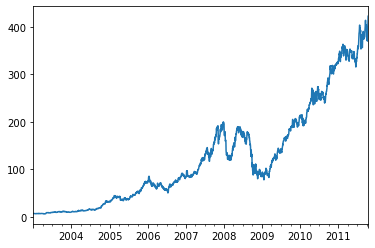

In [13]:
close_px.AAPL.plot()

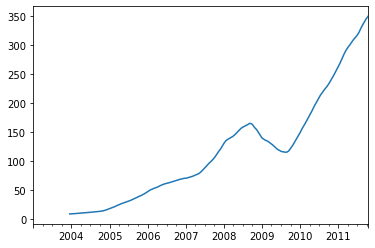

In [14]:
close_px.AAPL.rolling(250).mean().plot()

In [15]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [16]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

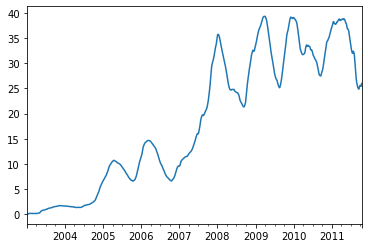

In [17]:
appl_std250.plot()

In [246]:
 expanding_mean = appl_std250.expanding().mean()

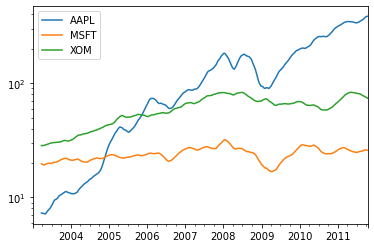

In [247]:
close_px.rolling(60).mean().plot(logy=True)

In [248]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [18]:
aapl_px = close_px.AAPL['2006':'2007']

In [250]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [251]:
ewma60 = aapl_px.ewm(span=30).mean()

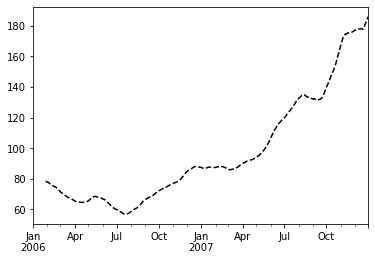

In [252]:
 ma60.plot(style='k--', label='Simple MA')

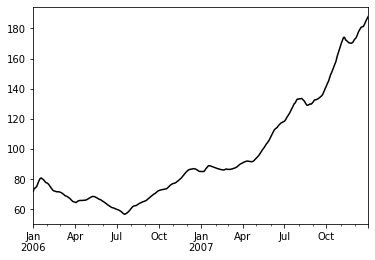

In [253]:
 ewma60.plot(style='k-', label='EW MA')

No handles with labels found to put in legend.


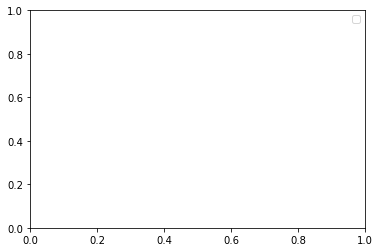

In [254]:
plt.legend()

## Binary Moving Window Functions

In [19]:
spx_px = close_px_all['SPX']

In [20]:
spx_rets = spx_px.pct_change()

In [22]:
returns = close_px.pct_change()

In [23]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

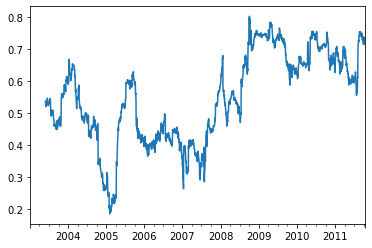

In [259]:
corr.plot()

In [260]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

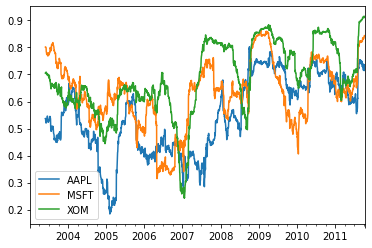

In [261]:
 corr.plot()

## User-Defined Moving Window Functions

In [1]:
 from scipy.stats import percentileofscore

In [2]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [24]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

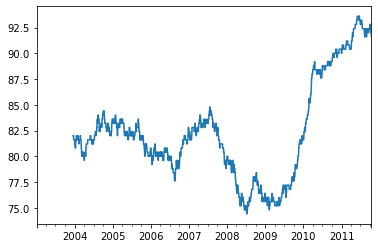

In [25]:
result.plot()

### CHAPTER 12
# Advanced pandas

## 12.1 Categorical Data

### Background and Motivation

In [26]:
import numpy as np; import pandas as pd

In [27]:
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)

In [28]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [29]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [30]:
 pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [31]:
 values = pd.Series([0, 1, 0, 0] * 2)

In [32]:
dim = pd.Series(['apple', 'orange'])

values

In [34]:
dim

0     apple
1    orange
dtype: object

In [35]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

## Categorical Type in pandas

In [36]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [37]:
 N = len(fruits)

In [38]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                 columns=['basket_id', 'fruit', 'count', 'weight'])

In [39]:
 df

,basket_id,fruit,count,weight
0,0,apple,7,3.706399
1,1,orange,6,0.557515
2,2,apple,9,0.791476
3,3,apple,5,3.230890
4,4,apple,10,3.905188
5,5,orange,12,0.103024
6,6,apple,4,3.164713
7,7,apple,5,0.190092


In [40]:
 fruit_cat = df['fruit'].astype('category')

In [41]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [42]:
c = fruit_cat.values

In [43]:
type(c)

pandas.core.arrays.categorical.Categorical

In [44]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [45]:
 c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [46]:
 df['fruit'] = df['fruit'].astype('category')

In [47]:
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [48]:
 my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])

In [49]:
my_categories

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

In [50]:
categories = ['foo', 'bar', 'baz']

In [51]:
codes = [0, 1, 2, 0, 0, 1]

In [52]:
 my_cats_2 = pd.Categorical.from_codes(codes, categories)

In [53]:
 my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

In [54]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                  ordered=True)

In [55]:
ordered_cat

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

In [56]:
 my_cats_2.as_ordered()

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

## Computations with Categoricals

In [57]:
np.random.seed(12345)

In [58]:
draws = np.random.randn(1000)

In [59]:
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [60]:
bins = pd.qcut(draws, 4)

In [61]:
 bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

In [62]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [63]:
 bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [64]:
 bins.codes[:10]

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [65]:
 bins = pd.Series(bins, name='quartile')

In [66]:
results = (pd.Series(draws)
            .groupby(bins)
            .agg(['count', 'min', 'max'])
            .reset_index())

In [67]:
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [68]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

### Better performance with categoricals

In [69]:
N = 10000000

In [70]:
draws = pd.Series(np.random.randn(N))

In [71]:
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

In [72]:
categories = labels.astype('category')

In [73]:
labels.memory_usage()

80000128

In [74]:
categories.memory_usage()

10000320

In [75]:
 %time _ = labels.astype('category')

Wall time: 508 ms


## Categorical Methods

In [76]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)

In [77]:
cat_s = s.astype('category')

In [78]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [79]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [80]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [81]:
actual_categories = ['a', 'b', 'c', 'd', 'e']

In [82]:
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [83]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): [a, b, c, d, e]

In [84]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [85]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

In [86]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [87]:
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d]

In [88]:
 cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b]

### Creating dummy variables for modeling

In [89]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

In [90]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## 12.2 Advanced GroupBy Use

### Group Transforms and “Unwrapped” GroupBys

In [91]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})

In [92]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [93]:
 g = df.groupby('key').value

In [94]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [96]:
g.transform(lambda x: x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [97]:
 g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [98]:
g.transform(lambda x: x * 2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [99]:
g.transform(lambda x: x.rank(ascending=False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [102]:
g.transform(normalize)

NameError: name 'normalize' is not defined

In [103]:
g.apply(normalize)

NameError: name 'normalize' is not defined

In [104]:
 g.transform('mean')


0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [105]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')

In [106]:
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

## Grouped Time Resampling

In [107]:
 N = 15

In [108]:
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)

In [109]:
df = pd.DataFrame({'time': times,
                   'value': np.arange(N)})

In [110]:
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [111]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [112]:
df2 = pd.DataFrame({'time': times.repeat(3),
                    'key': np.tile(['a', 'b', 'c'], N),
                    'value': np.arange(N * 3.)})

In [113]:
df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [114]:
time_key = pd.TimeGrouper('5min')

AttributeError: module 'pandas' has no attribute 'TimeGrouper'

In [115]:
resampled = (df2.set_index('time')
             .groupby(['key', time_key])
             .sum())

NameError: name 'time_key' is not defined

In [116]:
resampled

NameError: name 'resampled' is not defined

In [117]:
resampled.reset_index()

NameError: name 'resampled' is not defined

# 12.3 Techniques for Method Chaining

In [118]:
df = load_data()
df2 = df[df['col2'] < 0]
df2['col1_demeaned'] = df2['col1'] - df2['col1'].mean()
result = df2.groupby('key').col1_demeaned.std()

NameError: name 'load_data' is not defined

#### CHAPTER 13
## Introduction to Modeling Libraries in Python


## 13.1 Interfacing Between pandas and Model Code

In [119]:
 import pandas as pd

In [120]:
 import numpy as np

In [121]:
 data = pd.DataFrame({
      'x0': [1, 2, 3, 4, 5],
      'x1': [0.01, -0.01, 0.25, -4.1, 0.],
      'y': [-1.5, 0., 3.6, 1.3, -2.]})

In [122]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [123]:
 data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [124]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [125]:
df2 = pd.DataFrame(data.values, columns=['one', 'two', 'three'])

In [126]:
 df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


In [127]:
df3 = data.copy()

In [128]:
df3['strings'] = ['a', 'b', 'c', 'd', 'e']

In [129]:
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [130]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

In [131]:
model_cols = ['x0', 'x1']

In [132]:
data.loc[:, model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [133]:
data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                  categories=['a', 'b'])

In [134]:
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [135]:
dummies = pd.get_dummies(data.category, prefix='category')

In [136]:
data_with_dummies = data.drop('category', axis=1).join(dummies)

In [137]:
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


## 13.2 Creating Model Descriptions with Patsy

In [138]:
data = pd.DataFrame({
     'x0': [1, 2, 3, 4, 5],
     'x1': [0.01, -0.01, 0.25, -4.1, 0.],
     'y': [-1.5, 0., 3.6, 1.3, -2.]})

In [139]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [140]:
import patsy

In [141]:
y, X = patsy.dmatrices('y ~ x0 + x1', data)

In [142]:
 y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [143]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [144]:
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [145]:
np.asarray(X)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

In [146]:
patsy.dmatrices('y ~ x0 + x1 + 0', data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [147]:
coef, resid, _, _ = np.linalg.lstsq(X, y)

<ipython-input-147-ef4372856a50>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid, _, _ = np.linalg.lstsq(X, y)


In [148]:
coef


array([[ 0.31290976],
       [-0.07910564],
       [-0.26546384]])

In [149]:
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names)

In [150]:
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

## Data Transformations in Patsy Formulas

In [151]:
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', data)

In [152]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [153]:
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', data)

In [154]:
 X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [155]:
new_data = pd.DataFrame({
    'x0': [6, 7, 8, 9],
    'x1': [3.1, -0.5, 0, 2.3],
     'y': [1, 2, 3, 4]})

In [156]:
new_X = patsy.build_design_matrices([X.design_info], new_data)

In [157]:
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [158]:
y, X = patsy.dmatrices('y ~ I(x0 + x1)', data)

In [159]:
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

## Categorical Data and Patsy

In [160]:
data = pd.DataFrame({
    'key1': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b'],
    'key2': [0, 1, 0, 1, 0, 1, 0, 0],
    'v1': [1, 2, 3, 4, 5, 6, 7, 8],
    'v2': [-1, 0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]
  })

In [161]:
y, X = patsy.dmatrices('v2 ~ key1', data)

In [162]:
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [163]:
y, X = patsy.dmatrices('v2 ~ key1 + 0', data)

In [164]:
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [165]:
y, X = patsy.dmatrices('v2 ~ C(key2)', data)

In [166]:
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [167]:
data['key2'] = data['key2'].map({0: 'zero', 1: 'one'})

In [168]:
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [169]:
y, X = patsy.dmatrices('v2 ~ key1 + key2', data)

In [170]:
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zero]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

In [171]:
y, X = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2', data)

In [172]:
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

## 13.3 Introduction to statsmodels

### Estimating Linear Models

In [173]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [180]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
            size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size)

In [181]:
np.random.seed(12345)

In [182]:
N = 100
X = np.c_[dnorm(0, 0.4, size=N),
 dnorm(0, 0.6, size=N),
 dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]

In [183]:
y = np.dot(X, beta) + eps

In [184]:
X[:5]

array([[-0.12946849, -1.21275292,  0.50422488],
       [ 0.30291036, -0.43574176, -0.25417986],
       [-0.32852189, -0.02530153,  0.13835097],
       [-0.35147471, -0.71960511, -0.25821463],
       [ 1.2432688 , -0.37379916, -0.52262905]])

In [185]:
y[:5]

array([ 0.42786349, -0.67348041, -0.09087764, -0.48949442, -0.12894109])

In [186]:
X_model = sm.add_constant(X)

In [187]:
X_model[:5]

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097],
       [ 1.        , -0.35147471, -0.71960511, -0.25821463],
       [ 1.        ,  1.2432688 , -0.37379916, -0.52262905]])

In [188]:
model = sm.OLS(y, X)

In [189]:
results = model.fit()

In [190]:
results.params

array([0.17826108, 0.22303962, 0.50095093])

In [191]:
 print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.430
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              24.42
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                    7.44e-12
Time:                        18:46:23   Log-Likelihood:                         -34.305
No. Observations:                 100   AIC:                                      74.61
Df Residuals:                      97   BIC:                                      82.42
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [192]:
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])

In [193]:
data['y'] = y

In [194]:
data[:5]

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878
3,-0.351475,-0.719605,-0.258215,-0.489494
4,1.243269,-0.373799,-0.522629,-0.128941


In [195]:
results = smf.ols('y ~ col0 + col1 + col2', data=data).fit()

In [196]:
results.params

Intercept    0.033559
col0         0.176149
col1         0.224826
col2         0.514808
dtype: float64

In [197]:
results.tvalues

Intercept    0.952188
col0         3.319754
col1         4.850730
col2         6.303971
dtype: float64

In [198]:
results.predict(data[:5])

0   -0.002327
1   -0.141904
2    0.041226
3   -0.323070
4   -0.100535
dtype: float64

## 13.4 Introduction to scikit-learn

In [199]:
train = pd.read_csv('datasets/titanic/train.csv')

In [200]:
model = sm.tsa.AR(values)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
